In [1]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#@title Definimos los arreglos y creamos un DataFrame con ellos
x = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])
dicc = {"x": x, "y": y}
df = pd.DataFrame(dicc)
print(df)


       x     y
0    0.9  1.30
1    1.3  1.50
2    1.9  1.85
3    2.1  2.10
4    2.6  2.60
5    3.0  2.70
6    3.9  2.40
7    4.4  2.15
8    4.7  2.05
9    5.0  2.10
10   6.0  2.25
11   7.0  2.30
12   8.0  2.25
13   9.2  1.95
14  10.5  1.40
15  11.3  0.90
16  11.6  0.70
17  12.0  0.60
18  12.6  0.50
19  13.0  0.40
20  13.3  0.25


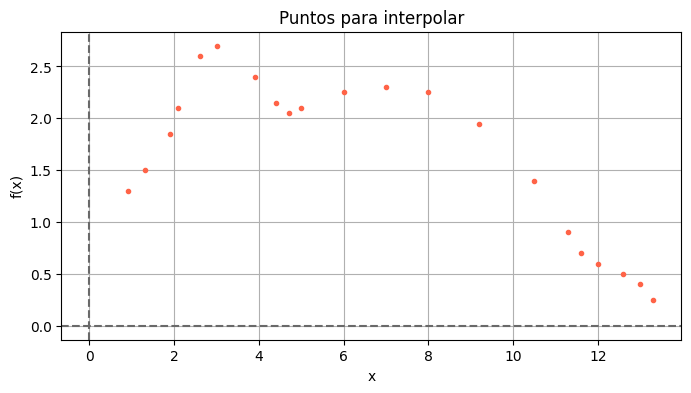

In [3]:
#@title Graficamos los puntos de la figura a interpolar
plt.figure(figsize=(8, 4))
plt.plot(df["x"], df["y"], "o", markersize = 3, color = "tomato")
plt.title("Puntos para interpolar")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.grid()
plt.show()

In [4]:
#@title Con ayuda de la funcion de scipy.interpolate.lagrange genero el polinomio que me describe aproximadamente la funcion
px = sp.interpolate.lagrange(x, y)
print(px)                                  #el grado del polinomio será el numero de puntos que le ingrese a mi arreglo

            20             19             18             17
-3.075e-11 x  + 4.279e-09 x  - 2.773e-07 x  + 1.111e-05 x 
              16            15           14         13         12
 - 0.0003082 x  + 0.006286 x  - 0.09769 x  + 1.183 x  - 11.32 x 
          11         10        9        8             7             6
 + 86.25 x  - 525.8 x  + 2564 x - 9969 x + 3.068e+04 x - 7.387e+04 x
              5             4           3             2
 + 1.368e+05 x - 1.899e+05 x + 1.9e+05 x - 1.287e+05 x + 5.246e+04 x - 9653


In [5]:
type(px)

numpy.poly1d

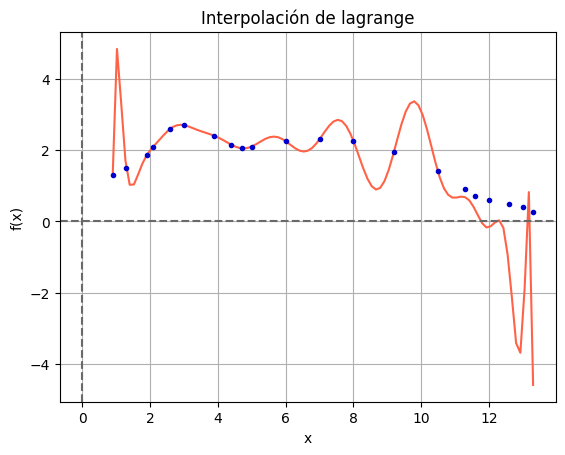

In [6]:
#@title Gráfica del método lagrange
x2 = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x2, px(x2), color = "tomato")
plt.plot(df["x"], df["y"], "o", markersize = 3, color = "mediumblue")
plt.title("Interpolación de lagrange")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.grid()
plt.show()

In [7]:
#@title Utilizando interpolate.CubicSpline calculamos el siguiente polinomio
px2 = sp.interpolate.CubicSpline(x, y)
type(px2)

scipy.interpolate._cubic.CubicSpline

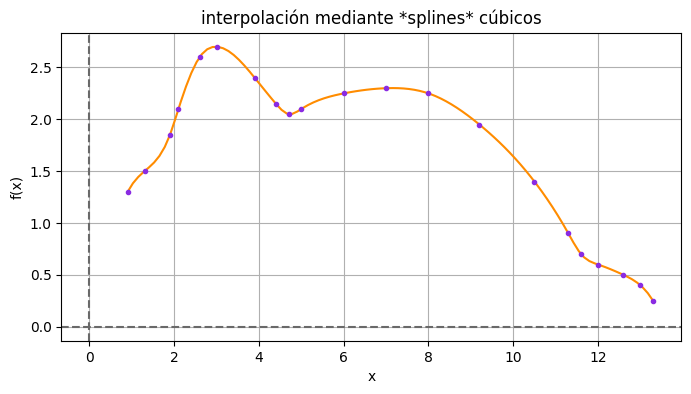

In [8]:
#@title Gráfica del método *splines* cúbicos
plt.figure(figsize=(8, 4))
plt.plot(x2, px2(x2), color = "darkorange")
plt.plot(df["x"], df["y"], "o", markersize = 3, color = "blueviolet")
plt.title("interpolación mediante *splines* cúbicos")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.grid()
plt.show()

In [9]:
#@title Para utilizar interpolate.CubicHermiteSpline calculamos primero las pendientes y las ingresamos a la función
dx = np.diff(x)
dy = np.diff(y)
m = (np.diff(y)) / (np.diff(x))
x1 = np.delete(x, [-1])
y1 = np.delete(y, [-1])

In [10]:
spline = sp.interpolate.CubicHermiteSpline(x1, y1, m)
print(spline)

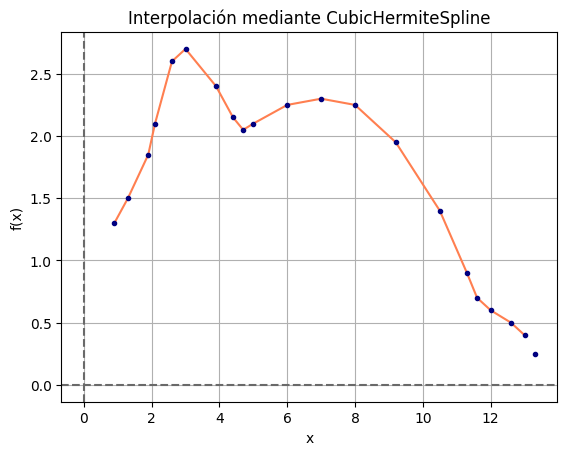

In [15]:
plt.plot(x1, spline(x1), color = "coral")
plt.plot(df["x"], df["y"], "o", markersize = 3, color = "navy")
plt.title("Interpolación mediante CubicHermiteSpline")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.grid()
plt.show()


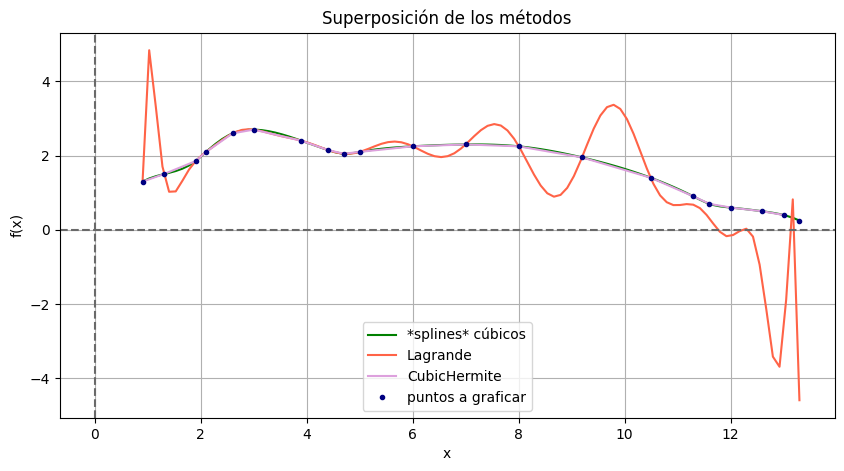

In [11]:
#@title Superposición de métodos
plt.figure(figsize=(10, 5))
plt.plot(x2, px2(x2), color = "green", label = "*splines* cúbicos")
plt.plot(x2, px(x2), color = "tomato", label = "Lagrande")
plt.plot(x1, spline(x1), color = "plum", label = "CubicHermite")
plt.plot(df["x"], df["y"], "o", markersize = 3, color = "navy", label = "puntos a graficar")
plt.title("Superposición de los métodos")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.grid()
plt.legend(loc="lower center")
plt.show()